# Analysis of Distribution of Waves in One Mission

In [263]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np

import mission_tools

%load_ext autoreload
%autoreload 2
%matplotlib widget

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load a single mission dataset for analysis

In [264]:
mission_nc_path = '../microSWIFT_data/final_dataset/mission_78.nc'
mission_dataset = nc.Dataset(mission_nc_path, mode='r')
mission_dataset

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    title: DUNEX microSWIFT drifter - Mission 78
    institution: University of Washington - Applied Physics Lab
    source: Observations from microSWIFT drifters deployed in the DUring Nearshore Events eXperiment (DUNEX)
    Conventions: CF-1.6
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    creator_country: USA
    creator_email: erainvil@uw.edu
    creator_name: EJ Rainville, Jim Thomson, Melissa Moulton, and Morteza Derakhti at University of Washington - Applied Physics Lab
    creator_phone: (303) 653-1226
    creator_sector: academic
    creator_state: Washington
    featureType: trajectory
    cdm_data_type: Trajectory
    platform: microSWIFT wave buoy
    publisher_country: USA
    publisher_email: frfwebmaster@usace.army.mil
    publisher_name: USACE/CHL/COAB
    history: 2022-12-16 03:30:20.563348 Python
    references: https://github.com/SASlabgroup/microSWIFT and http

## Plot the Drift Tracks of all microSWIFTs on the mission

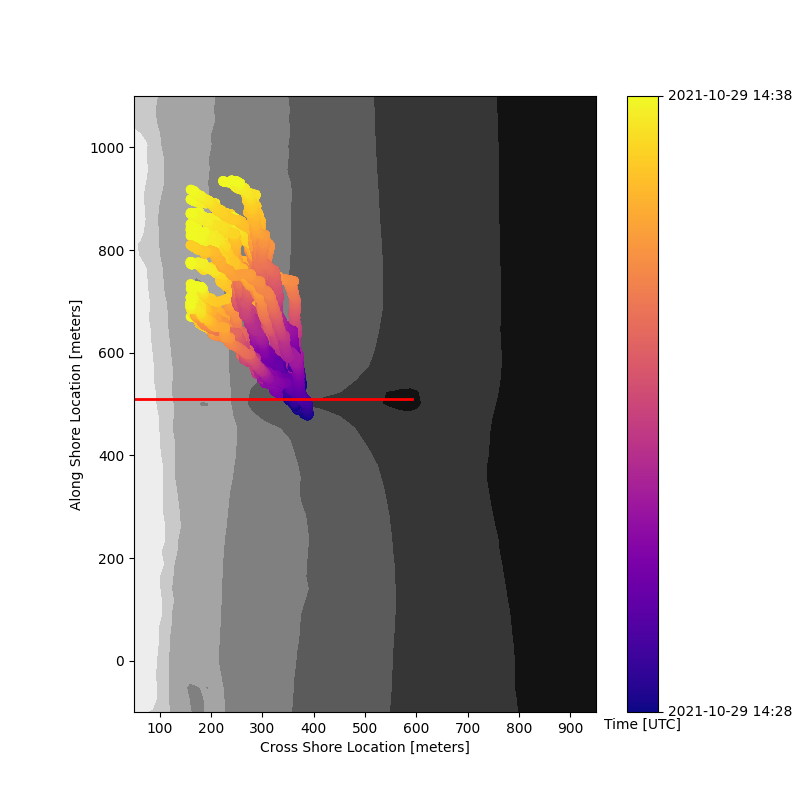

In [265]:
# bathy_file = 'https://chlthredds.erdc.dren.mil/thredds/dodsC/frf/' \
#              'geomorphology/DEMs/surveyDEM/data/' \
#              'FRF_geomorphology_DEMs_surveyDEM_20211021.nc'
bathy_file = '../microSWIFT_data/FRFdata/FRF_geomorphology_DEMs_surveyDEM_20211021.nc'
mission_tools.plot_mission_tracks(mission_dataset, bathy_file)

## Plot the Time Series of Sea Surface Elevation Along Each Track

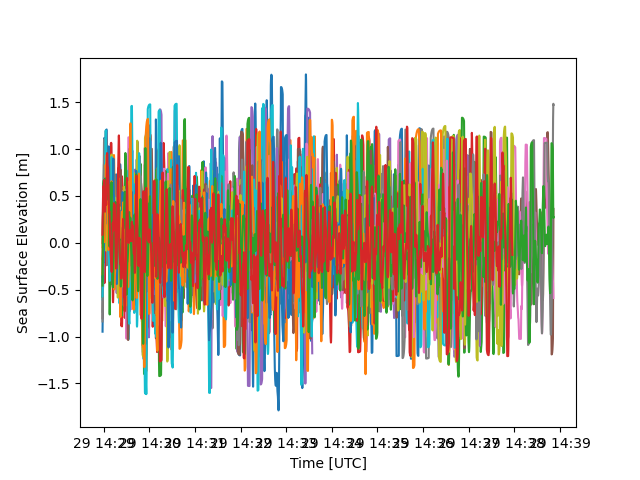

In [266]:
mission_tools.plot_mission_eta(mission_dataset)

## Compute the Height and Location of each individual wave on the Mission

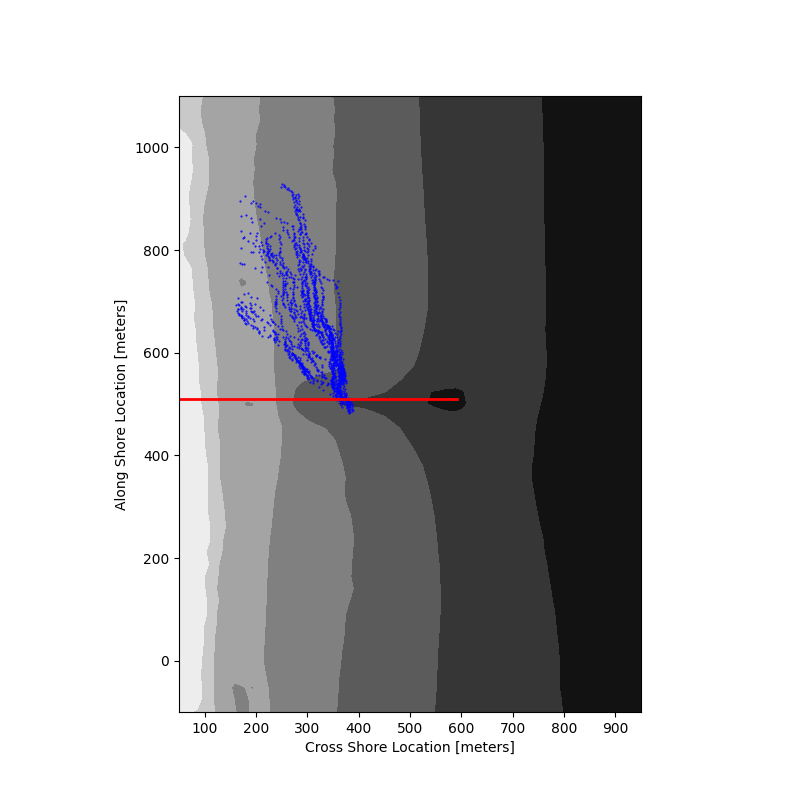

In [267]:
x_locations = mission_dataset['xFRF'][:]
y_locations = mission_dataset['yFRF'][:]
eta = mission_dataset['sea_surface_elevation'][:]
time = mission_dataset['time'][:]

wave_heights, \
wave_x_locs, \
wave_y_locs = mission_tools.compute_individual_waves(x_locations,
                                                     y_locations,
                                                     eta, time,
                                                     bathy_file)

mission_tools.plot_wave_locations(wave_x_locs, wave_y_locs, bathy_file, 'b')

## Plot the Distribution of Wave Heights on this Mission

Hs = 1.9159307415393796 meters - 4 * sqrt(var(eta))
Hs = 1.5578099051613024 meters - Average Top Third Method
Hs = 1.5400660535793531 meters - 1.416 * H_rms


/Users/ejrainville/Documents/DUNEXMainExp/.dunex-venv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


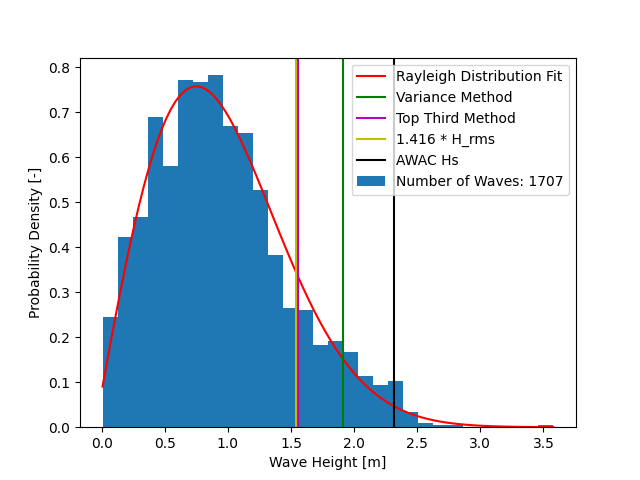

In [268]:
num_bins = 30
ax = mission_tools.plot_wave_height_dist(wave_heights, num_bins)

sig_wave_height_var = mission_tools.compute_sig_wave_height_var(eta)
print(f'Hs = {sig_wave_height_var} meters - 4 * sqrt(var(eta))')

sig_wave_height_top_third = mission_tools.compute_sig_wave_height_top_third(wave_heights)
print(f'Hs = {sig_wave_height_top_third} meters - Average Top Third Method')

sig_wave_height_rms = mission_tools.compute_sig_wave_height_rms(wave_heights)
print(f'Hs = {sig_wave_height_rms} meters - 1.416 * H_rms')

awac_file = '../microSWIFT_data/FRFdata/FRF-ocean_waves_awac-4.5m_202110.nc'
mission_time = np.median(mission_dataset['time'][:])
awac_sig_wave_height = mission_tools.closest_awac_sig_wave_height(mission_time, awac_file)

ax.axvline(x=sig_wave_height_var, label='Variance Method', color='g')
ax.axvline(x=sig_wave_height_top_third, label='Top Third Method', color='m')
ax.axvline(x=sig_wave_height_rms, label='1.416 * H_rms', color='y')
ax.axvline(x=awac_sig_wave_height, label='AWAC Hs', color='k')
ax.legend()

## Wave Heights from Individual microSWIFTs

Unhandled message type set_device_pixel_ratio. {'device_pixel_ratio': 2, 'type': 'set_device_pixel_ratio'}
Unhandled message type set_device_pixel_ratio. {'device_pixel_ratio': 2, 'type': 'set_device_pixel_ratio'}


[49 40 41 24 23 15 12 37 64 38 62 54 10 72 16 42 45 73 60 34 33 66 57 35]
Hs = 1.8938688619732869 meters - Variance Method
Hs = 1.599501349396873 meters - Average Top Third Method


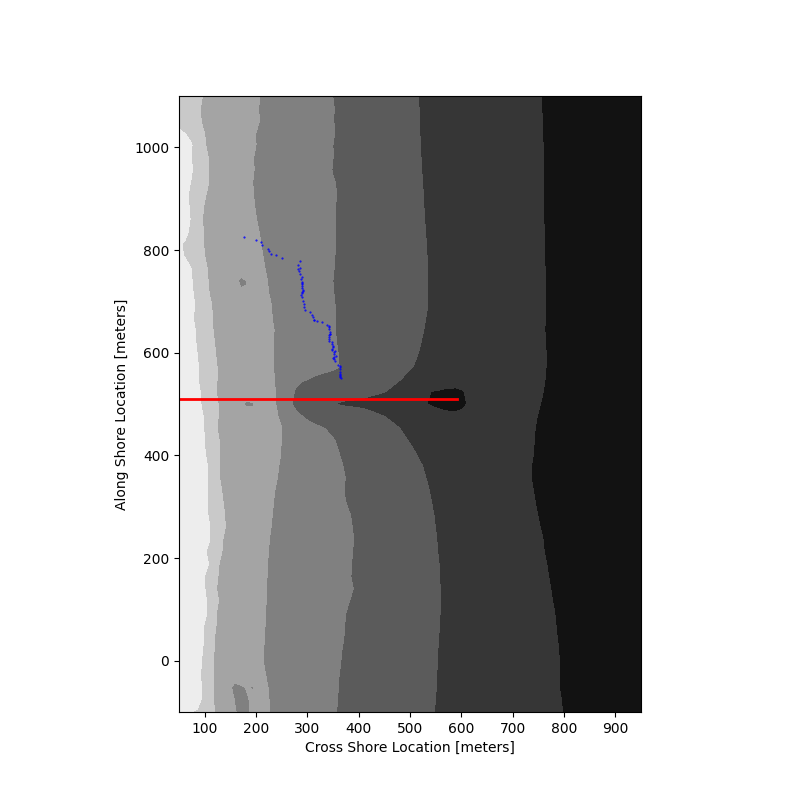

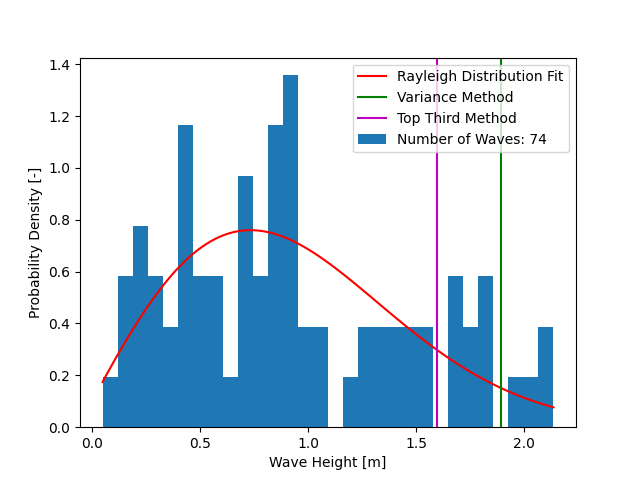

Unhandled message type set_device_pixel_ratio. {'device_pixel_ratio': 2, 'type': 'set_device_pixel_ratio'}
Unhandled message type set_device_pixel_ratio. {'device_pixel_ratio': 2, 'type': 'set_device_pixel_ratio'}
Unhandled message type set_device_pixel_ratio. {'device_pixel_ratio': 2, 'type': 'set_device_pixel_ratio'}
Unhandled message type set_device_pixel_ratio. {'device_pixel_ratio': 2, 'type': 'set_device_pixel_ratio'}


In [269]:
trajectories = mission_dataset['trajectory'][:]
print(trajectories)
trajectory_ind = 0
x_locations = mission_dataset['xFRF'][trajectory_ind,:]
y_locations = mission_dataset['yFRF'][trajectory_ind,:]
eta = mission_dataset['sea_surface_elevation'][trajectory_ind,:]
time = mission_dataset['time'][:]

wave_heights, \
wave_x_locs, \
wave_y_locs = mission_tools.compute_individual_waves(x_locations,
                                                     y_locations,
                                                     eta, time,
                                                     bathy_file,
                                                     single_trajectory=True)

mission_tools.plot_wave_locations(wave_x_locs, wave_y_locs, bathy_file, 'b')

num_bins = 30
ax = mission_tools.plot_wave_height_dist(wave_heights, num_bins)

sig_wave_height_var = mission_tools.compute_sig_wave_height_var(eta, single_trajectory=True)
print(f'Hs = {sig_wave_height_var} meters - Variance Method')

sig_wave_height_top_third = mission_tools.compute_sig_wave_height_top_third(wave_heights)
print(f'Hs = {sig_wave_height_top_third} meters - Average Top Third Method')

ax.axvline(x=sig_wave_height_var, label='Variance Method', color='g')
ax.axvline(x=sig_wave_height_top_third, label='Top Third Method', color='m')
ax.legend()